In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2

# Load the images directories
path = '/Users/san5h0llow/Data_Science/Face_recognition/Data_Set'
image_paths = list(paths.list_images(path))

In [2]:
images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    images.append(image)
    labels.append(label)

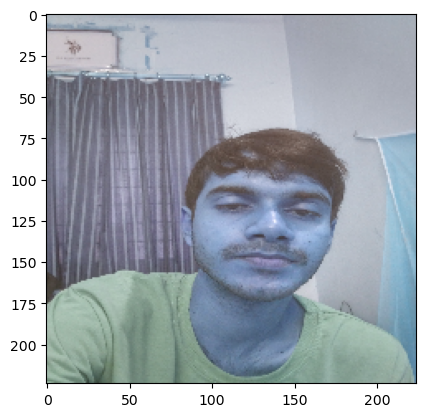

In [3]:
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

In [4]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import numpy as np

images = np.array(images) / 255.0
labels = np.array(labels)

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

2024-03-19 18:29:57.582697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.10, random_state= 42, stratify= labels)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

In [7]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
base_input = base_model.input

base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [11]:
batch_size = 40
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 10

In [12]:
history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size), steps_per_epoch= train_steps, validation_data = (test_X, test_Y), validation_steps= validation_steps, epochs= epochs)

/var/folders/29/qgdtjbz504l5y0fqzxvwjwy00000gn/T/ipykernel_6886/504464780.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size), steps_per_epoch= train_steps, validation_data = (test_X, test_Y), validation_steps= validation_steps, epochs= epochs)


Epoch 1/10
72/72 [==============================] - 147s 2s/step - loss: 0.0860 - accuracy: 0.9738 - val_loss: 0.0129 - val_accuracy: 0.9969
Epoch 2/10
72/72 [==============================] - 112s 2s/step - loss: 0.0140 - accuracy: 0.9976 - val_loss: 0.0070 - val_accuracy: 0.9969
Epoch 3/10
72/72 [==============================] - 107s 1s/step - loss: 0.0071 - accuracy: 0.9997 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/10
72/72 [==============================] - 105s 1s/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 9.7282e-04 - val_accuracy: 1.0000
Epoch 5/10
72/72 [==============================] - 105s 1s/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 4.7346e-04 - val_accuracy: 1.0000
Epoch 6/10
72/72 [==============================] - 107s 1s/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 8.5754e-04 - val_accuracy: 1.0000
Epoch 7/10
72/72 [==============================] - 106s 1s/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 4.2713e-04 - val_accuracy: 1.00

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

9/9 [==============================] - 11s 978ms/step
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       134
    Original       1.00      1.00      1.00       190

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

[[134   0]
 [  0 190]]


In [14]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 100.00%


In [15]:
# N = epochs
# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
# plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

# plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
# plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

# plt.title("Training Loss and Accuracy on Brain Dataset")
# plt.xlabel("Epoch")
# plt.ylabel("Loss / Accuracy")
# plt.legend(loc= "lower left")
# plt.savefig("plot.jpg")

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.0860314667224884, 0.013958923518657684, 0.007069632411003113, 0.006451594643294811, 0.0033777644857764244, 0.00475394818931818, 0.004103224258869886, 0.003199170809239149, 0.001715166843496263, 0.001212756847962737]
[0.9738402366638184, 0.9975584149360657, 0.9996511936187744, 0.9989535808563232, 0.9996511936187744, 0.9993023872375488, 0.9989535808563232, 0.9993023872375488, 0.9996511936187744, 1.0]
[0.012924904935061932, 0.007002195343375206, 0.00228493963368237, 0.0009728186996653676, 0.00047346498467959464, 0.000857541395816952, 0.000427131075412035, 0.0021290467120707035, 0.00041449282434768975, 0.0005286933155730367]
[0.9969135522842407, 0.9969135522842407, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


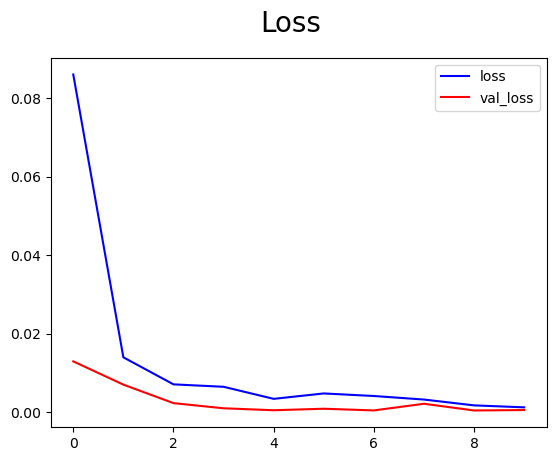

In [20]:
fig = plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

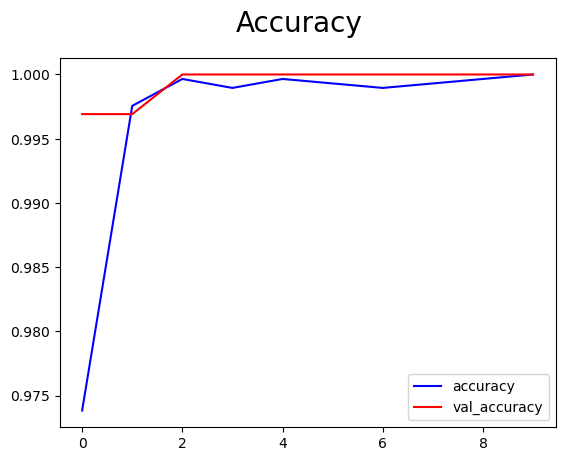

In [21]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()